# Ejemplo: Mars Express

* Este ejemplo demuestra cómo podemos analizar las posiciones, desplazamientos, velocidades y aceleraciones medias a partir de datos reales de posición, suministrados por la Agencia Espacial Europea ([ESA](https://www.esa.int/)).
    
* La sonda [Mars Express](https://es.wikipedia.org/wiki/Mars_Express) fue lanzada el 2 de Junio del 2003 y llegó a Marte en Diciembre de ese año. 
Queremos usar los datos suministrados por ESA para ilustrar el movimiento del Mars Express, analizar la 
velocidad y aceleración del módulo.

* Algunas posiciones (en coordenadas cartesianas) del Mars Express en su viaje desde la Tierra hasta Marte están listados en el archivo `marsexpress.txt` (los datos han sido reducidos para que sean estríctamente bidimensionales).

![2022-04-01_12-35.png](./2022-04-01_12-35.png)

Cada posición es de la forma
$$
\vec{r}(t)=x(t)\hat{i} + y(t)\hat{j} + z(t)\hat{k}.
$$
Por ejemplo
$$
\vec{r}(t_0) = x_0\hat{i} + y_0\hat{j} + z_0\hat{k}, \\
\vec{r}(t_1) = x_1\hat{i} + y_1\hat{j} + z_1\hat{k}, \\
\vdots \\
\vec{r}(t_{N-1}) = x_{N-1}\hat{i} + y_{N-1}\hat{j} + z_{N-1}\hat{k}. \\
$$

Primero cargaremos las posiciones a arreglos de Numpy:

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [4]:
data = np.genfromtxt('marsexpress.txt')
t = data[:,0] # días
x_km = data[:,1] # km
y_km = data[:,2] # km
z_km = data[:,3] # km

Ahora podemos hacer un gráfico rápido de las posiciones

(-39111438.3, 204588112.3, -163273171.0, 145814311.0)

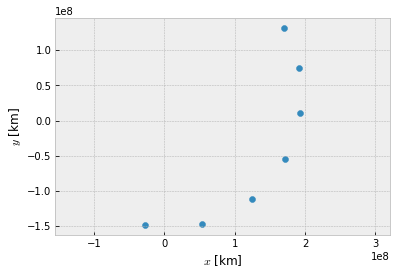

In [5]:
plt.scatter(x_km,y_km)
plt.xlabel('$x$ [km]')
plt.ylabel('$y$ [km]')
plt.axis('equal')

* Podemos convertir las unidades desde kilómetros a [Unidades Astronómicas](https://es.wikipedia.org/wiki/Unidad_astron%C3%B3mica) (la distancia media desde el Sol 
a la Tierra): 
$$
1\ UA = 149 597 870. 7 \ km
$$

In [45]:
UA = 149597870.7 # km
x = x_km/UA # UA
y = y_km/UA # UA

In [37]:
r_marte = 1.523679 # UA, https://es.wikipedia.org/wiki/Marte_(planeta)

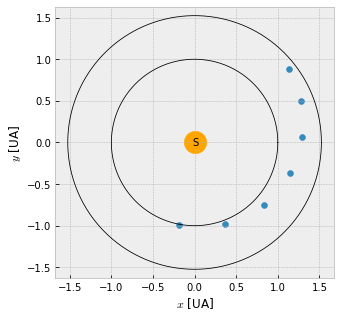

In [50]:
plt.figure(figsize=(5,5))
plt.scatter(x,y)
# elementos de decorado adicionales
plt.xlabel('$x$ [UA]')
plt.ylabel('$y$ [UA]')
plt.axis('equal')
plt.scatter(0,0,s=500, color='orange') # círculo que representa el Sol
plt.text(-0.03,-0.03,'S') # Texto 'S' para el Sol
# el resto grafica 2 círculos, uno para la Tierra y otro para Marte (se aproxima que sus órbitas son circulares)
theta = np.linspace(0, 2*np.pi, 1000)
plt.plot(np.cos(theta),np.sin(theta), color='black', linewidth=0.8)
plt.plot(r_marte_UA*np.cos(theta),r_marte_UA*np.sin(theta), color='black', linewidth=0.8)

# Desplazamientos

El vector desplazamiento entre dos tiempos $t_i$ y $t_{i+1}$ es dado por
\begin{align}
(\Delta r)_i &= \vec{r}(t_{i+1})-\vec{r}(t_i) \\
& = \left(x(t_{i+1})-x(t_i)\right)\hat{i} + \left(y(t_{i+1})-y(t_i)\right)\hat{j} + \left(z(t_{i+1})-z(t_i)\right)\hat{k} \\
& = (\Delta x)_i\hat{i} + (\Delta y)_i\hat{j} + (\Delta z)_i\hat{k}
\end{align}